In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
subset_drop =pd.read_csv("subset_drop")
subset_drop.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,UP_Boys,Upper Primary_Girls,Upper Primary_Total,Total_priamary
0,A & N Islands,2012-13,0.83,0.51,0.68,4.29,1.09,1.23,1.295
1,A & N Islands,2013-14,1.35,1.06,1.21,4.29,1.54,0.51,1.465
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,1.355
3,Arunachal Pradesh,2012-13,3.30,3.05,3.18,3.21,3.51,3.36,4.860
4,Arunachal Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,6.240


In [4]:
def min_max(col):
    
    top = subset_drop [col].idxmax()
    top_ods = pd.DataFrame(subset_drop .loc[top])
    
    bottom = subset_drop [col].idxmin()
    bot_ods = pd.DataFrame(subset_drop .loc[bottom])
    
    min_max_ods = pd.concat([top_ods,bot_ods], axis=1)
    
    return min_max_ods

In [5]:
min_max('Total_priamary')

,69,80
State_UT,Mizoram,Puducherry
year,2012-13,2014-15
Primary_Boys,24.27,0.36
Primary_Girls,23.93,0.38
Primary_Total,24.11,0.37
UP_Boys,19.35,0.44
Upper Primary_Girls,19.21,0.69
Upper Primary_Total,19.28,0.56
Total_priamary,33.75,0.65


In [6]:
subset_drop.loc[ subset_drop["Total_priamary"]> 25.00].State_UT

69               Mizoram
73    Arunachal  Pradesh
Name: State_UT, dtype: object

#uncomenting the following will  give you a min-max value for each and every column

In [7]:

#min_max('Primary_Girls')
#min_max('Primary_Boys')
#min_max('Upper Primary_Girls')
#min_max('UP_Boys')

we are going to drop row number 69,80 for our outlier removal

In [8]:
subset_drop.drop(subset_drop.index[[69,80,73]],inplace = True)

In [9]:
subset_drop

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,UP_Boys,Upper Primary_Girls,Upper Primary_Total,Total_priamary
0,A & N Islands,2012-13,0.83,0.51,0.68,4.29,1.09,1.23,1.295
1,A & N Islands,2013-14,1.35,1.06,1.21,4.29,1.54,0.51,1.465
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,1.355
3,Arunachal Pradesh,2012-13,3.30,3.05,3.18,3.21,3.51,3.36,4.860
4,Arunachal Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,6.240
...,...,...,...,...,...,...,...,...,...
105,West Bengal,2013-14,3.44,2.37,2.91,5.63,3.10,4.31,5.065
106,West Bengal,2014-15,2.13,0.79,1.47,5.84,2.88,4.30,3.620
107,All India,2012-13,4.68,4.66,4.67,2.30,4.01,3.13,6.235
108,All India,2013-14,4.53,4.14,4.34,3.09,4.49,3.77,6.225


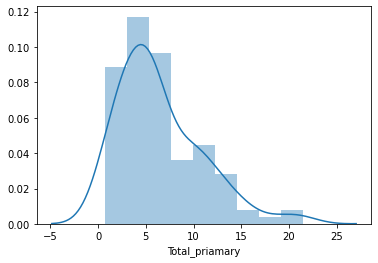

In [10]:
sns.distplot(subset_drop["Total_priamary"])


#  we are using get dummy method to convert year into numerical data

In [11]:
dummies = pd.get_dummies(subset_drop.year,drop_first = True)
dummies.head()

,2013-14,2014-15
0,0,0
1,1,0
2,0,1
3,0,0
4,1,0


In [12]:
subset_drop2= pd.concat([subset_drop,dummies],axis='columns')
subset_drop2

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,UP_Boys,Upper Primary_Girls,Upper Primary_Total,Total_priamary,2013-14,2014-15
0,A & N Islands,2012-13,0.83,0.51,0.68,4.29,1.09,1.23,1.295,0,0
1,A & N Islands,2013-14,1.35,1.06,1.21,4.29,1.54,0.51,1.465,1,0
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,1.355,0,1
3,Arunachal Pradesh,2012-13,3.30,3.05,3.18,3.21,3.51,3.36,4.860,0,0
4,Arunachal Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,6.240,1,0
...,...,...,...,...,...,...,...,...,...,...,...
105,West Bengal,2013-14,3.44,2.37,2.91,5.63,3.10,4.31,5.065,1,0
106,West Bengal,2014-15,2.13,0.79,1.47,5.84,2.88,4.30,3.620,0,1
107,All India,2012-13,4.68,4.66,4.67,2.30,4.01,3.13,6.235,0,0
108,All India,2013-14,4.53,4.14,4.34,3.09,4.49,3.77,6.225,1,0


#  we are using one hot encoding to convert states and UT to numerical value 
# giving them number from 1 to 30

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
subset_drop2.State_UT = le.fit_transform(subset_drop2.State_UT)
subset_drop2

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,UP_Boys,Upper Primary_Girls,Upper Primary_Total,Total_priamary,2013-14,2014-15
0,0,2012-13,0.83,0.51,0.68,4.29,1.09,1.23,1.295,0,0
1,0,2013-14,1.35,1.06,1.21,4.29,1.54,0.51,1.465,1,0
2,0,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,1.355,0,1
3,2,2012-13,3.30,3.05,3.18,3.21,3.51,3.36,4.860,0,0
4,2,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,6.240,1,0
...,...,...,...,...,...,...,...,...,...,...,...
105,30,2013-14,3.44,2.37,2.91,5.63,3.10,4.31,5.065,1,0
106,30,2014-15,2.13,0.79,1.47,5.84,2.88,4.30,3.620,0,1
107,1,2012-13,4.68,4.66,4.67,2.30,4.01,3.13,6.235,0,0
108,1,2013-14,4.53,4.14,4.34,3.09,4.49,3.77,6.225,1,0


In [15]:
subset_drop2.to_csv("subset_drop2" , index=False)

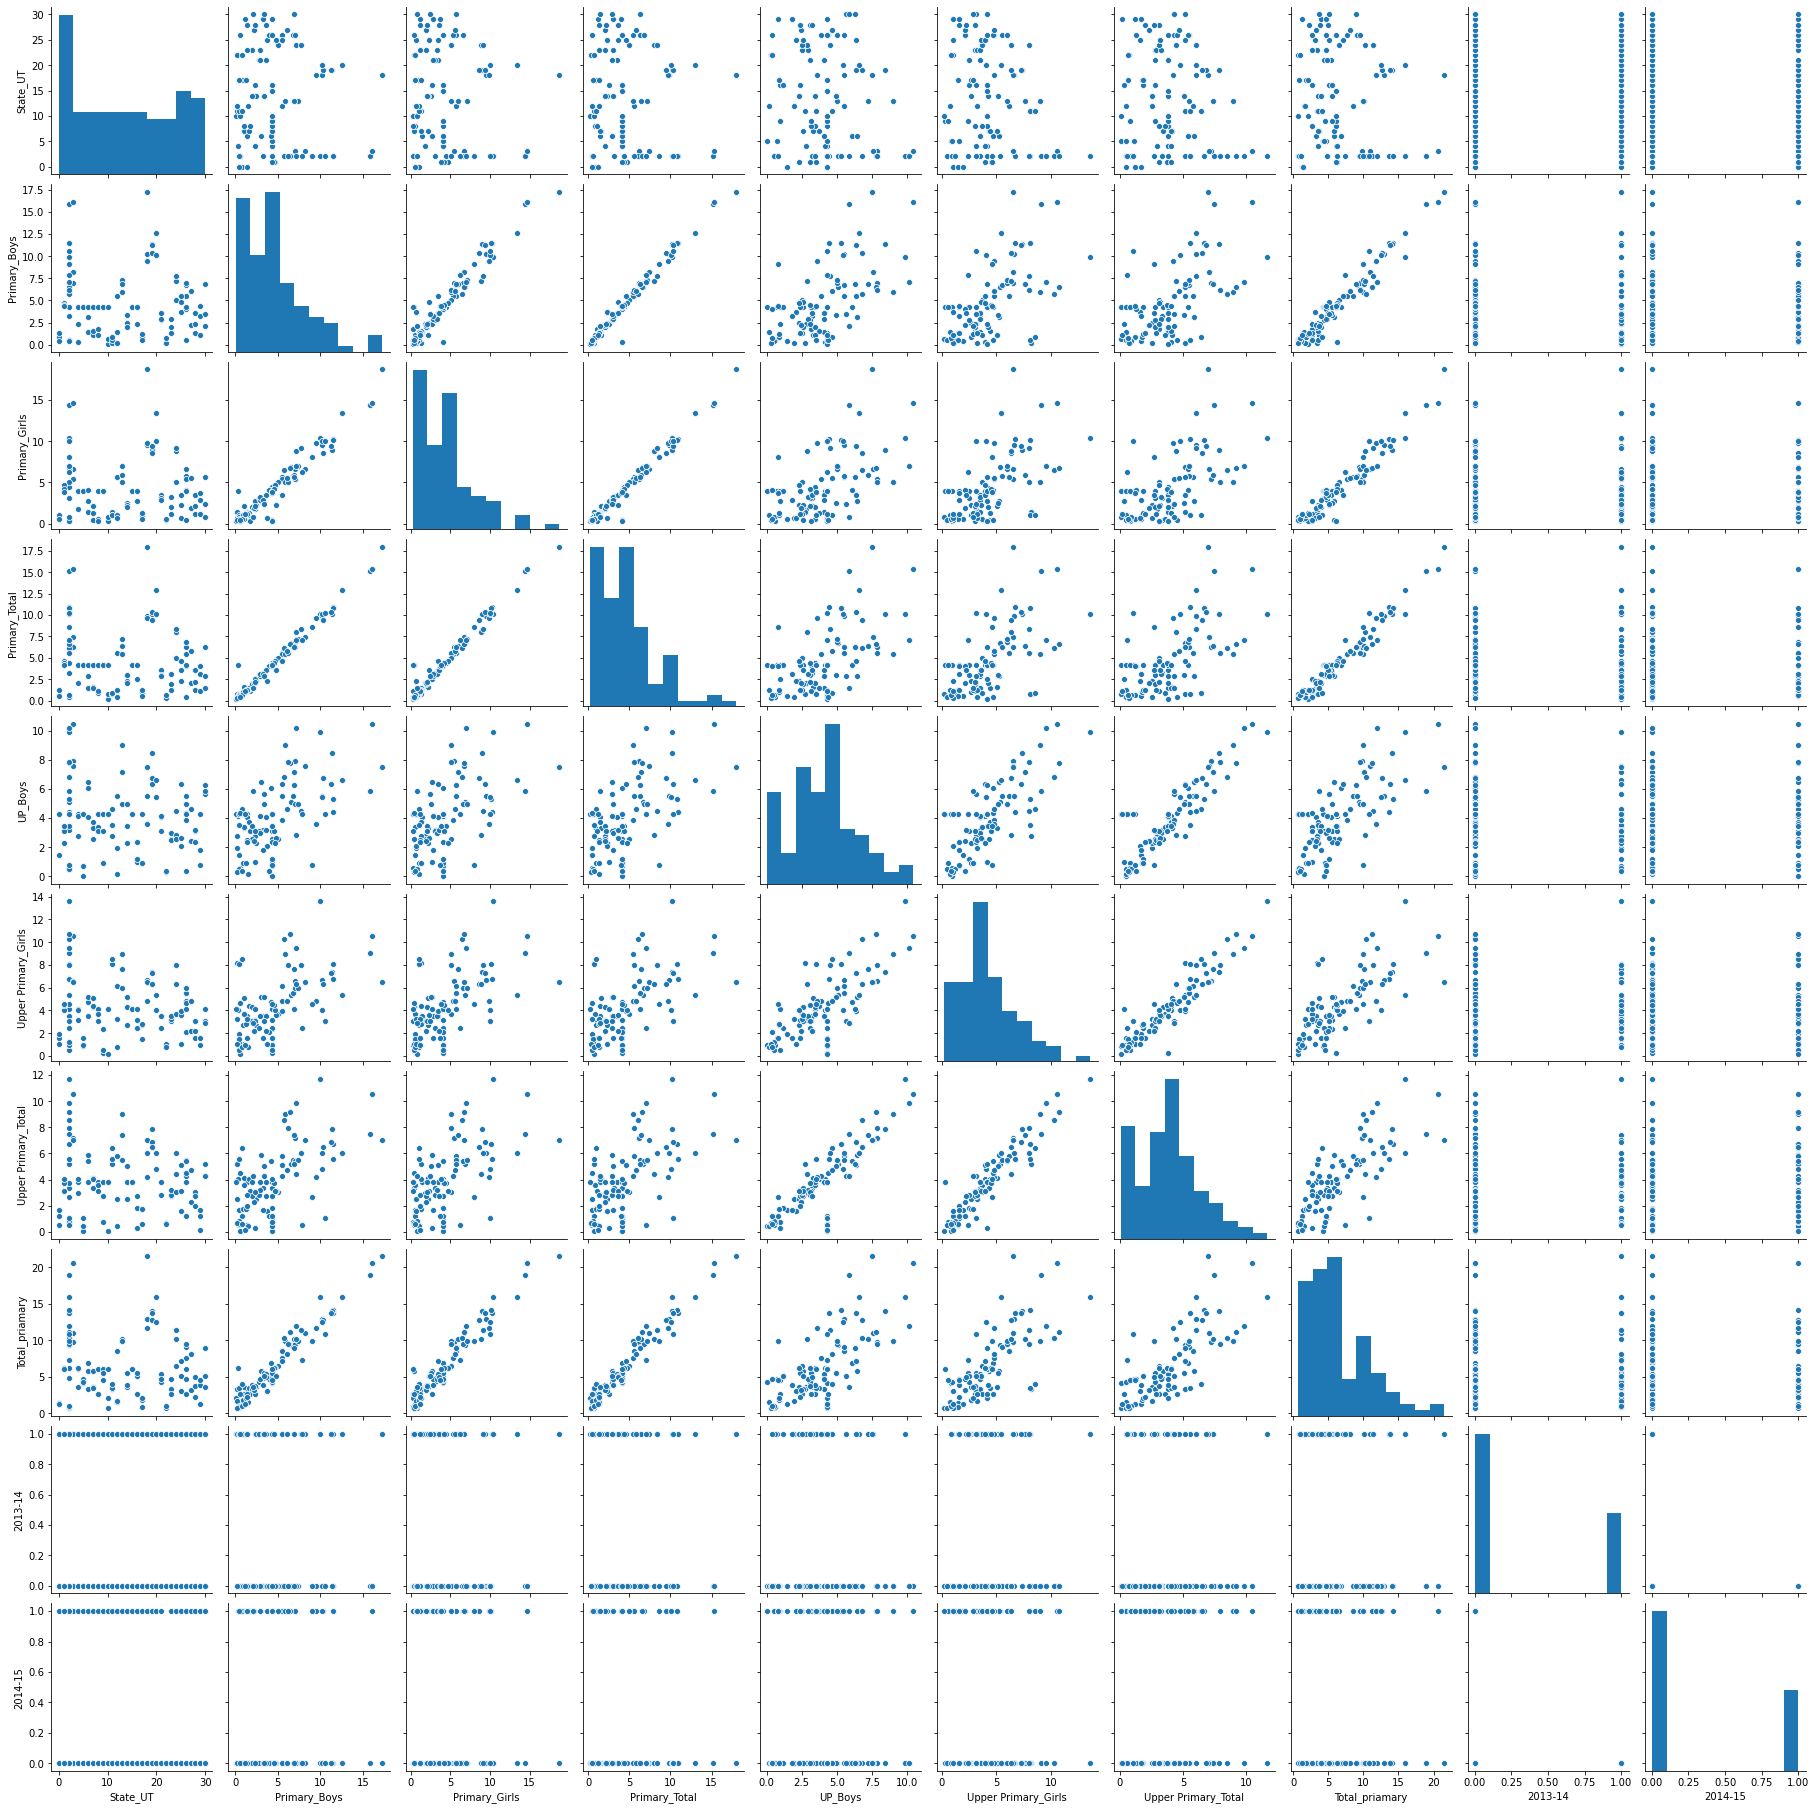

In [16]:
sns.pairplot(subset_drop2)